In [1]:
import pandas as pd 
import numpy as np
from nltk.corpus import stopwords
import re #regex
from textblob import TextBlob #sentimate analysis
from nltk.probability import FreqDist

#graphs
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objects as go

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv
/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv


In [3]:
#data importation
tdf= pd.read_csv('/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv', lineterminator='\n')#trump df
bdf=pd.read_csv('/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv', lineterminator='\n')#biden df

In [4]:
tdf.tail()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
697095,2020-11-05 00:00:54,1.324140e+18,No to be political or anything but half of Ame...,1.0,1.0,Twitter for iPhone,9.483651e+17,Polly Tishon,PollyThe4k,Definitely not political,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-05 11:59:05.551202
697096,2020-11-05 00:00:55,1.324140e+18,@KBarnsey @KamalaHarris Hope you don’t mind if...,0.0,0.0,Twitter for iPad,2.782117e+09,Renee Turner,ReneeLoudProud,VOTE VOTE! I’m dang tired of being held hostag...,...,8.0,American & STILL HERE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-05 11:59:05.546858
697097,2020-11-05 00:00:56,1.324140e+18,I see so many Christians &amp; Atheists puttin...,3.0,0.0,Twitter for iPhone,7.638295e+17,Sam Mason,Samuel_J_Mason,"Passionate aviator (A330), Delta MEC C48 Chair...",...,172.0,"Atlanta, GA",33.749099,-84.390185,Atlanta,United States of America,North America,Georgia,GA,2020-11-05 11:59:05.815374
697098,2020-11-05 00:00:58,1.324140e+18,"Na na na na na na na na, hey hey hey goodbye #...",3.0,0.0,Twitter for Android,3.891866e+08,Daniel K ™,GoLeafsGoDaniel,#OutKast #LeafsForever #WeTheNorth #LondonKni...,...,730.0,Stankonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-05 11:59:05.528641
697099,2020-11-05 00:00:59,1.324140e+18,@jesusmarana @LuisArroyoM Lo que más me llama ...,0.0,0.0,Twitter for Android,2.972143e+09,Caballa/Andaluz,jalaisan14,Spain & Aúpa #AtléticodeMadrid,...,113.0,Planeta Tierra 🌍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-05 11:59:05.802378


<h1>data analysis</h1>

In [5]:
bdf.describe()

,tweet_id,likes,retweet_count,user_id,user_followers_count,lat,long
count,4.536730e+05,453673.000000,453673.000000,4.536730e+05,4.536730e+05,214691.000000,214691.000000
mean,1.321309e+18,9.251172,2.347592,4.569237e+17,2.530033e+04,35.815888,-53.376451
std,2.387205e+15,464.878912,116.548058,5.587920e+17,3.929132e+05,16.614538,63.954155
min,1.316529e+18,0.000000,0.000000,2.654000e+03,0.000000e+00,-79.406307,-161.755833
25%,1.319452e+18,0.000000,0.000000,2.191219e+08,8.000000e+01,33.258882,-100.445882
50%,1.321654e+18,0.000000,0.000000,2.500845e+09,4.720000e+02,39.783730,-78.494108
75%,1.323697e+18,1.000000,0.000000,1.096819e+18,2.287000e+03,42.790219,-0.127647
max,1.324140e+18,165702.000000,63473.000000,1.324132e+18,8.241710e+07,90.000000,179.048837


In [6]:
tdf.isnull().sum()

created_at                   0
tweet_id                     0
tweet                        0
likes                        0
retweet_count                0
source                     730
user_id                      0
user_name                   15
user_screen_name             0
user_description         71518
user_join_date               0
user_followers_count         0
user_location           213048
lat                     367202
long                    367202
city                    531997
country                 369184
continent               369172
state                   456974
state_code              470824
collected_at                 0
dtype: int64

In [7]:
bdf.isnull().sum()

created_at                   0
tweet_id                     0
tweet                        0
likes                        0
retweet_count                0
source                     570
user_id                      0
user_name                   16
user_screen_name             0
user_description         50223
user_join_date               0
user_followers_count         0
user_location           141939
lat                     238982
long                    238982
city                    345713
country                 239818
continent               239810
state                   292979
state_code              301065
collected_at                 0
dtype: int64

<h1>data cleaning</h1>

In [8]:
#drop useles columns
bdf=bdf.drop(columns=['tweet_id','collected_at','user_description','collected_at'])
tdf=tdf.drop(columns=['tweet_id','collected_at','user_description','collected_at'])

In [9]:
#adding a collumn
bdf.loc[:,'condidat'] = 'Biden'
tdf.loc[:,'condidat'] = 'trump'

In [10]:
tdf.head()

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,condidat
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,trump
1,2020-10-15 00:00:01,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,2011-07-08 13:12:20,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,trump
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,trump
3,2020-10-15 00:00:02,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,2017-02-05 21:32:17,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,trump
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,2009-06-15 19:05:35,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,trump


In [11]:
#concat both datasets
data = pd.concat([bdf,tdf])

In [12]:
data.sort_values(by='created_at').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1150773 entries, 0 to 697099
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   created_at            1150773 non-null  object 
 1   tweet                 1150773 non-null  object 
 2   likes                 1150773 non-null  float64
 3   retweet_count         1150773 non-null  float64
 4   source                1149473 non-null  object 
 5   user_id               1150773 non-null  float64
 6   user_name             1150742 non-null  object 
 7   user_screen_name      1150773 non-null  object 
 8   user_join_date        1150773 non-null  object 
 9   user_followers_count  1150773 non-null  float64
 10  user_location         795786 non-null   object 
 11  lat                   544589 non-null   float64
 12  long                  544589 non-null   float64
 13  city                  273063 non-null   object 
 14  country               541771 non-nu

In [13]:
data

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,condidat
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,Biden
1,2020-10-15 00:00:18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,2012-09-08 01:03:57,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Biden
2,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,2015-08-30 19:38:21,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,Biden
3,2020-10-15 00:00:21,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,2017-01-25 14:16:17,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Biden
4,2020-10-15 00:00:22,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,2018-08-24 01:49:01,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,Biden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697095,2020-11-05 00:00:54,No to be political or anything but half of Ame...,1.0,1.0,Twitter for iPhone,9.483651e+17,Polly Tishon,PollyThe4k,2018-01-03 01:27:15,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,trump
697096,2020-11-05 00:00:55,@KBarnsey @KamalaHarris Hope you don’t mind if...,0.0,0.0,Twitter for iPad,2.782117e+09,Renee Turner,ReneeLoudProud,2014-09-24 04:37:44,8.0,American & STILL HERE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,trump
697097,2020-11-05 00:00:56,I see so many Christians &amp; Atheists puttin...,3.0,0.0,Twitter for iPhone,7.638295e+17,Sam Mason,Samuel_J_Mason,2016-08-11 20:08:27,172.0,"Atlanta, GA",33.749099,-84.390185,Atlanta,United States of America,North America,Georgia,GA,trump
697098,2020-11-05 00:00:58,"Na na na na na na na na, hey hey hey goodbye #...",3.0,0.0,Twitter for Android,3.891866e+08,Daniel K ™,GoLeafsGoDaniel,2011-10-12 00:38:59,730.0,Stankonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,trump


<h1>tweet count for each country</h1>

In [14]:
# wee look for the rows of specific condidat then we remove the rows that has nan in country 
#then we group by avec country then we get the count then we sort  from big to low

#for biden
y = data.query('(condidat == "Biden") ').dropna(subset=['country']).groupby(by='country').count().tweet.sort_values(ascending=False)
x = data.query('(condidat == "Biden") ').dropna(subset=['country']).groupby(by='country').count().tweet.sort_values(ascending=False).index
#for trump
y2 = data.query('(condidat == "trump") ').dropna(subset=['country']).groupby(by='country').count().tweet.sort_values(ascending=False)
x2 = data.query('(condidat == "trump")').dropna(subset=['country']).groupby(by='country').count().tweet.sort_values(ascending=False).index

fig = go.Figure([go.Bar(x=x, y=y, name='joe Biden'),
                 go.Bar(x=x2, y=y2, name='donald Trump')])


fig.update_layout(title_text='tweets count for each countries')
fig.update_xaxes(title='countries')
fig.update_yaxes(title='tweet count')
fig.show()


<h1>tweet count for each country usa not included</h1>

In [15]:
# wee look for the rows of specific condidat then we remove the rows that has nan in country 
#then we group by avec country then we get the count then we sort  from big to low

#for biden
y = data.query('(condidat == "Biden")& (country != "United States")& (country != "United States of America") ').dropna(subset=['country']).groupby(by='country').count().tweet.sort_values(ascending=False)
x = data.query('(condidat == "Biden")& (country != "United States")& (country != "United States of America") ').dropna(subset=['country']).groupby(by='country').count().tweet.sort_values(ascending=False).index
#for trump
y2 = data.query('(condidat == "trump")& (country != "United States")& (country != "United States of America") ').dropna(subset=['country']).groupby(by='country').count().tweet.sort_values(ascending=False)
x2 = data.query('(condidat == "trump")& (country != "United States")& (country != "United States of America")').dropna(subset=['country']).groupby(by='country').count().tweet.sort_values(ascending=False).index

fig = go.Figure([go.Bar(x=x, y=y, name='joe Biden'),
                 go.Bar(x=x2, y=y2, name='donald Trump')])


fig.update_layout(title_text='tweets count for each country usa not included')
fig.update_xaxes(title='countries')
fig.update_yaxes(title='tweet count')
fig.show()

<h1>tweet count for each state</h1>

In [16]:
# wee look for the rows of specific condidat then we remove the rows that has nan in country 
#then we group by avec country then #AmineAbouothmane we get the count then we sort  from big to low

#for biden
y = data.query('(condidat == "Biden")& (country == "United States of America") ').dropna(subset=['state']).groupby(by='state').count().tweet.sort_values(ascending=False)
x = data.query('(condidat == "Biden")& (country == "United States of America") ').dropna(subset=['state']).groupby(by='state').count().tweet.sort_values(ascending=False).index
#for trump
y2 = data.query('(condidat == "trump")& (country == "United States of America") ').dropna(subset=['state']).groupby(by='state').count().tweet.sort_values(ascending=False)
x2 = data.query('(condidat == "trump")& (country == "United States of America")').dropna(subset=['state']).groupby(by='state').count().tweet.sort_values(ascending=False).index

fig = go.Figure([go.Bar(x=x, y=y, name='joe Biden'),
                 go.Bar(x=x2, y=y2, name='donald Trump')])


fig.update_layout(title_text='tweets count for each state')
fig.update_xaxes(title='states')
fig.update_yaxes(title='tweet count')
fig.show()


<h1>tweet likes </h1>

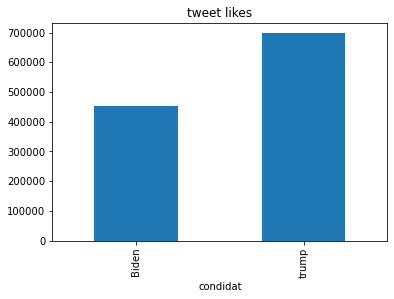

In [17]:
y = data.groupby('condidat').likes.count()
y.plot(x='condidate',y="likes",kind='bar',title='tweet likes')



<h1>top 5 sources</h1>

In [18]:
y = data.query('(condidat == "Biden") ').groupby(by='source').count().tweet.sort_values(ascending=False)[:5]
x = data.query('(condidat == "Biden") ').groupby(by='source').count().tweet.sort_values(ascending=False)[:5].index
y2 = data.query('(condidat == "trump") ').groupby(by='source').count().tweet.sort_values(ascending=False)[:5]
x2 = data.query('(condidat == "trump") ').groupby(by='source').count().tweet.sort_values(ascending=False)[:5].index
fig = go.Figure([go.Bar(x=x, y=y, name='Biden'),go.Bar(x=x2, y=y2, name='trump')])

# Customize aspect
fig.update_layout(title_text='top 5 sources')
fig.update_xaxes(title='sources')
fig.update_yaxes(title='tweets count')
fig.show()

<h1>tweet count in country "morocco" </h1>

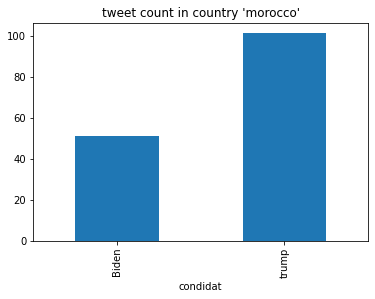

In [19]:
country="Morocco"
a=data[data.country==country].groupby('condidat').tweet.count()
a.plot(x='condidate',y="tweet",kind='bar',title="tweet count in country 'morocco'")



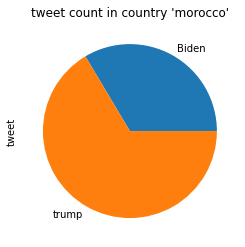

In [20]:
a.plot(x='condidate',y="tweet",kind='pie',title="tweet count in country 'morocco'")

<h2>example of word tokenz</h2>

In [21]:
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [22]:


example_sent = "This is a sample words sentence, showing off the stop words filtration sentence."


stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(example_sent)

filtered_sentence = [w for w in word_tokens if not w in stop_words]

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
#AmineAbouothmane
print(word_tokens)
print(filtered_sentence)

['This', 'is', 'a', 'sample', 'words', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', 'sentence', '.']
['This', 'sample', 'words', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', 'sentence', '.']


In [23]:
from nltk.probability import FreqDist
fdist=FreqDist()
for word in filtered_sentence:
    fdist[word.lower()]+=1
fdist

FreqDist({'words': 2, 'sentence': 2, 'this': 1, 'sample': 1, ',': 1, 'showing': 1, 'stop': 1, 'filtration': 1, '.': 1})

In [24]:
def Tokenization(text):
    stop_words = set(stopwords.words('english'))

    word_tokens = word_tokenize(text)

    filtered_sentence = [w for w in word_tokens if not w in stop_words]

    filtered_sentence = []

    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    fdist=FreqDist()
    for word in filtered_sentence:
        fdist[word.lower()]+=1
    return fdist

In [25]:
#regular expression
import re

t='@fazf hello !! https://pythonprogramming.net/ ohmygod ??, '
def cleanText(text):
    try:
        # remove @name and links and retweet and hashtags and symbols in the tweet
        text=re.sub(r'@[A-Za-z0-9]+','',text)
        text=re.sub(r'#','',text)
        text=re.sub(r'RT[\s]+','',text)
        text=re.sub(r'https?:\/\/\S+','',text)
        text=re.sub(r'[^\w]', ' ', text)
    except:
        pass
    return text
print(cleanText(t))

 hello     ohmygod     


<h1> Sentiment Analysis</h1>

In [26]:
#get the tweets from depends on condidat and number of tweets 
#we choose the United States of America to make sure that the langauge is english for the sentiment analysis to work

def getTweet(condidat,nb):#condidat[trump,Biden]  nb nomver of tweets we want
    tweets = data.query('condidat == "'+condidat+'"').sort_values('user_followers_count',ascending=False).drop_duplicates(['user_name'])[['tweet','country']]
    #return nb tweets and removing nan 
    tweets = tweets.dropna().loc[tweets.country=='United States of America'][:nb]
    return tweets

#get the tweets 
nb=1000
dd=getTweet('trump',nb)

#reset the index
dd.reset_index(inplace=True, drop=True)
#apply the function on tweets and stor results to a new column
dd['ClearTweet']=dd['tweet'].apply(cleanText)
#AmineAbouothmane
dd

,tweet,country,ClearTweet
0,"President Donald #Trump’s youngest daughter, T...",United States of America,President Donald Trump s youngest daughter Ti...
1,Woah. Have you read this article?\n\nAll the p...,United States of America,Woah Have you read this article All the pre...
2,#LadyGaga fired back at #DonaldTrump's team ht...,United States of America,LadyGaga fired back at DonaldTrump s team
3,Minuto a minuto: #Trump gana los estados decis...,United States of America,Minuto a minuto Trump gana los estados decisi...
4,#Trump Habla en segundos. Todavía nada está de...,United States of America,Trump Habla en segundos Todavía nada está def...
...,...,...,...
995,"#Trump has nothing, absolutely nothing to run ...",United States of America,Trump has nothing absolutely nothing to run o...
996,Seek God + His way thru for you this month com...,United States of America,Seek God His way thru for you this month com...
997,This is why we vote Trump / Pence 2020! Save A...,United States of America,This is why we vote Trump Pence 2020 Save A...
998,@nominm @haliun_87 Юугаа ч мэдэхгүй цээжилсэн ...,United States of America,_87 Юугаа ч мэдэхгүй цээжилсэн ганц нэрээ дав...


<h3>The sentiment function of textblob returns two properties, polarity, and subjectivity. ... Subjective sentences generally refer to personal opinion, emotion or judgment</h3><br>
<h3>The key aspect of sentiment analysis is to analyze a body of text for understanding the opinion expressed by it. Typically, we quantify this sentiment with a positive or negative value, called polarity</h3>

In [27]:
#create fuction to get the subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
def getAnalysis(score):
    if score<0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'positive'

In [28]:
#adding columns and applying the functionss 
dd['subjectivity']=dd['ClearTweet'].apply(getSubjectivity)
dd['polarity']=dd['ClearTweet'].apply(getPolarity)
dd['analysis']=dd['polarity'].apply(getAnalysis)
dd.head()

,tweet,country,ClearTweet,subjectivity,polarity,analysis
0,"President Donald #Trump’s youngest daughter, T...",United States of America,President Donald Trump s youngest daughter Ti...,0.0,0.0,neutral
1,Woah. Have you read this article?\n\nAll the p...,United States of America,Woah Have you read this article All the pre...,0.0,0.0,neutral
2,#LadyGaga fired back at #DonaldTrump's team ht...,United States of America,LadyGaga fired back at DonaldTrump s team,0.0,0.0,neutral
3,Minuto a minuto: #Trump gana los estados decis...,United States of America,Minuto a minuto Trump gana los estados decisi...,0.0,0.0,neutral
4,#Trump Habla en segundos. Todavía nada está de...,United States of America,Trump Habla en segundos Todavía nada está def...,0.0,0.0,neutral


<h1>word cloud</h1>

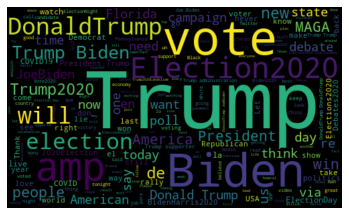

In [29]:
#plot the word cloud
allwords=' '.join( [twts for twts in dd['ClearTweet']] )
wordcloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allwords)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

<h1>visualisation</h1>

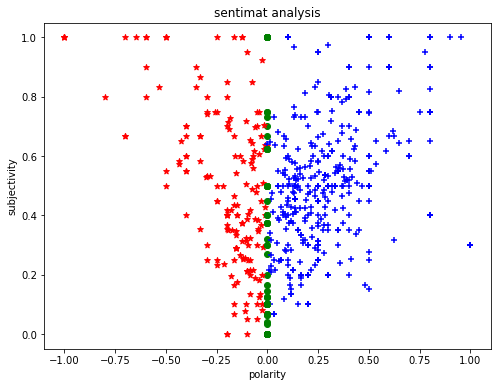

In [30]:
#plot the polarity and subjectivity

plt.figure(figsize=(8,6))
for i in range(0,nb):
    p=dd['polarity'][i]
    if p<0:
        plt.scatter(dd['polarity'][i],dd['subjectivity'][i],color='red', marker = '*')
    elif p==0:
        plt.scatter(dd['polarity'][i],dd['subjectivity'][i],color='green', marker = 'o')
    else:
        plt.scatter(dd['polarity'][i],dd['subjectivity'][i],color='blue', marker = '+')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.title('sentimat analysis')
plt.show()

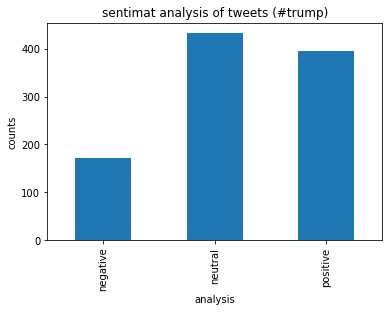

In [31]:
o=dd.groupby('analysis').analysis.count()
neu=dd[dd['analysis']=='neutral'].ClearTweet.count()
po=dd[dd['analysis']=='positive'].ClearTweet.count()
neg=dd[dd['analysis']=='negative'].ClearTweet.count()

fig = go.Figure(data=[go.Pie(labels=["positivity","negativity","neutrality"], values=[po,neg,neu])])
fig.update_layout(title_text='sentimat analysis of tweets (#trump)')
fig.show()
o.plot(x='analysis',kind='bar',ylabel="counts",title="sentimat analysis of tweets (#trump)")


<h1>sentimal analysis #Biden tweets</h1>

In [32]:
ddb=getTweet('Biden',1000)
#reset the index
ddb.reset_index(inplace=True, drop=True)
#apply the function on tweets and stor results to a new column
ddb['ClearTweet']=ddb['tweet'].apply(cleanText)
#adding columns and applying the functionss 
ddb['subjectivity']=ddb['ClearTweet'].apply(getSubjectivity)
ddb['polarity']=ddb['ClearTweet'].apply(getPolarity)
ddb['analysis']=ddb['polarity'].apply(getAnalysis)
ddb.tail()

,tweet,country,ClearTweet,subjectivity,polarity,analysis
995,Duh. The GOP ruins everything. Imagine how far...,United States of America,Duh The GOP ruins everything Imagine how far...,0.550000,-0.008333,negative
996,One more rust belt state to win and #biden is ...,United States of America,One more rust belt state to win and biden is i...,0.450000,0.650000,positive
997,“The people of Scranton don’t live off the sto...,United States of America,The people of Scranton don t live off the sto...,0.500000,-0.056818,negative
998,We Need Biden’s Summit of Democracies https://...,United States of America,We Need Biden s Summit of Democracies Democra...,0.000000,0.000000,neutral
999,"Please dear God, please help #JoeBiden, #Kamal...",United States of America,Please dear God please help JoeBiden KamalaH...,0.288889,-0.155556,negative


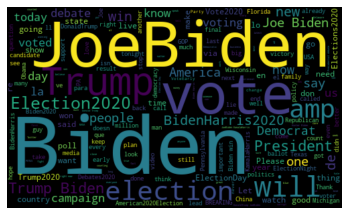

In [33]:
#plot the word cloud
allwords=' '.join( [twts for twts in ddb['ClearTweet']] )
wordcloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allwords)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

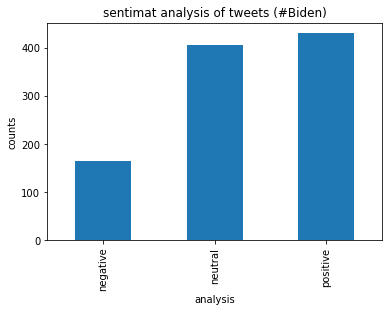

In [34]:
o=ddb.groupby('analysis').analysis.count()
neu=ddb[ddb['analysis']=='neutral'].ClearTweet.count()
po=ddb[ddb['analysis']=='positive'].ClearTweet.count()
neg=ddb[ddb['analysis']=='negative'].ClearTweet.count()

fig = go.Figure(data=[go.Pie(labels=["positivity","negativity","neutrality"], values=[po,neg,neu])])
fig.update_layout(title_text='sentimat analysis of tweets (#Biden)')
fig.show()
o.plot(x='analysis',kind='bar',ylabel="counts",title="sentimat analysis of tweets (#Biden)")